<a href="https://www.kaggle.com/code/aabdollahii/intro-to-federated-learning-heart-disease?scriptVersionId=262846404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#4CAF50;text-align:center;">📚 Introduction to Federated Learning</h1>
  
  <h2 style="color:#FFD700;">1. What is Federated Learning?</h2>
  <p>
    Federated Learning (FL) is a <b>decentralized machine learning approach</b> where multiple devices or organizations collaboratively train a model without sharing their raw data. Instead of sending data to a central server, each participant trains a local model and only shares model updates.
  </p>
  <p>
    Think of it as many chefs cooking in their own kitchens, but sharing only their <i>recipe improvements</i> — not the secret ingredients.
  </p>
  
  <h2 style="color:#FFD700;">2. Why is Federated Learning Important?</h2>
  <ul>
    <li>✅ <b>Privacy Preservation:</b> Sensitive data never leaves the local device.</li>
    <li>✅ <b>Reduced Data Transfer:</b> Only model parameters/gradients are exchanged.</li>
    <li>✅ <b>Regulatory Compliance:</b> Helps meet GDPR, HIPAA, and similar regulations.</li>
    <li>✅ <b>Edge Computing:</b> Utilizes data and compute resources at the source.</li>
  </ul>
  
  <h2 style="color:#FFD700;">3. How Does It Work?</h2>
  <ol>
    <li>📤 <b>Server sends initial model</b> to all participants.</li>
    <li>🖥️ <b>Local training</b> happens on each participant's private data.</li>
    <li>📥 <b>Local model updates</b> are sent back to the server.</li>
    <li>🔄 <b>Aggregation</b> (e.g., FedAvg algorithm) combines updates into a global model.</li>
    <li>🔁 Repeat until the model converges.</li>
  </ol>
  
  <h2 style="color:#FFD700;">4. Real-World Example</h2>
  <p>
    Google’s <b>Gboard keyboard</b> uses Federated Learning to improve text prediction:
    your typed messages stay on your device, while only the learned model changes are sent
    to improve the shared model.
  </p>
  
  <h2 style="color:#FFD700;">5. Key Challenges</h2>
  <ul>
    <li>⚠️ <b>Non-IID Data:</b> Data distributions differ across participants.</li>
    <li>⚠️ <b>Network Reliability:</b> Communication delays affect training speed.</li>
    <li>⚠️ <b>Security:</b> Model updates can still leak sensitive patterns.</li>
    <li>⚠️ <b>Client Coordination:</b> Handling dropped or slow clients is tricky.</li>
  </ul>
  
  <h2 style="color:#FFD700;">6. Common Techniques</h2>
  <ul>
    <li>🔹 <b>FedAvg:</b> Weighted average of client models.</li>
    <li>🔹 <b>Secure Aggregation:</b> Protects updates during transfer.</li>
    <li>🔹 <b>Differential Privacy:</b> Adds noise to updates for privacy.</li>
    <li>🔹 <b>Model Personalization:</b> Tailors global models to local needs.</li>
  </ul>
</div>


<div style="background-color:green;color:pur;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;"> Step 1: Loading and Understanding the Heart Disease Dataset</h1>
  
  <p>
    In this step, we load the <b>Heart Disease Dataset</b> directly from our Kaggle input folder and take a first look at its structure.
    This dataset contains multiple health-related attributes such as <i>age, cholesterol, blood pressure, maximum heart rate</i>,
    and a <b>target</b> column indicating the presence or absence of heart disease.
  </p>
  
  <h2 style="color:#FFD700;">📋 Dataset Overview</h2>
  <ul>
    <li><b>File size:</b> ~200 KB — lightning fast to load.</li>
    <li><b>Rows:</b> Each row represents a patient's record.</li>
    <li><b>Columns:</b> Include both numerical (e.g., age, cholesterol) and categorical (e.g., sex, chest pain type) features.</li>
    <li><b>Target variable:</b> <code>target</code> — <b>1</b> means heart disease present, <b>0</b> means absent.</li>
  </ul>
  
  <h2 style="color:#FFD700;">🔍 Why This Step Matters</h2>
  <p>
    Before applying any machine learning — especially Federated Learning —
    we need to:
    <ul>
      <li>✅ Verify we can load the dataset properly.</li>
      <li>✅ Understand basic column meanings and data types.</li>
      <li>✅ Check for missing values and simple statistics.</li>
    </ul>
  </p>
  
  <p><b>Next:</b> We'll explore the dataset with Pandas to confirm its structure and prepare it for federated splitting.</p>
</div>


In [2]:
import pandas as pd

# Load dataset from Kaggle input folder
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

# Basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Column info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (1025, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">💓 Step 1 — Dataset Understanding Results</h1>
  
  <h2 style="color:#FFD700;">📦 Dataset Shape & Structure</h2>
  <ul>
    <li><b>Rows:</b> 1,025 patient records.</li>
    <li><b>Columns:</b> 14 features including the <code>target</code> label.</li>
    <li>All features are <b>numeric</b> — 13 integers & 1 float (<code>oldpeak</code>).</li>
    <li><b>No missing values</b> — dataset is clean and ready for modeling.</li>
  </ul>
  
  <h2 style="color:#FFD700;">🔍 Feature Insights</h2>
  <ul>
    <li><b>Age:</b> Ranges from 29 to 77 years (mean ≈ 54).</li>
    <li><b>Sex:</b> Binary (0 = female, 1 = male), majority are male (~70%).</li>
    <li><b>Chest Pain Type (<code>cp</code>):</b> Values from 0 to 3, representing categories.</li>
    <li><b>Resting Blood Pressure (<code>trestbps</code>):</b> Average ≈ 132 mm Hg.</li>
    <li><b>Cholesterol (<code>chol</code>):</b> Average ≈ 246 mg/dL, some unusually high values (max 564).</li>
    <li><b>Max Heart Rate Achieved (<code>thalach</code>):</b> Ranges from 71 to 202 bpm, mean ≈ 149 bpm.</li>
    <li><b>Depression (<code>oldpeak</code>):</b> Continuous, ranges 0 → 6.2.</li>
  </ul>
  
  <h2 style="color:#FFD700;">🎯 Target Variable</h2>
  <ul>
    <li><code>target</code> = 1 → Heart disease present.</li>
    <li><code>target</code> = 0 → No heart disease.</li>
    <li>Balanced enough for binary classification (~51% positive cases).</li>
  </ul>
  
  <h2 style="color:#FFD700;">💡 Key Observations</h2>
  <ul>
    <li>✅ Completely clean — no missing data, ready for immediate use.</li>
    <li>✅ Mix of categorical-encoded and continuous numeric features.</li>
    <li>⚠️ Some features (e.g., cholesterol) have extreme outliers that may influence training.</li>
    <li>🌐 Perfect for simulating <b>federated learning</b> via partitioning patient records into multiple hospitals/clients.</li>
  </ul>
</div>


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">🏥 Step 2 — Simulating Federated Clients</h1>
  
  <p>
    To mimic how Federated Learning works in the real world, we split our heart disease dataset into multiple <b>clients</b>.
    You can think of each client as a separate hospital or clinic that has its own patient records.
    This lets us train a shared global model <i>without sharing raw data</i>.
  </p>
  
  <h2 style="color:#FFD700;">📌 Types of Splits</h2>
  <ul>
    <li><b>IID (Independent & Identically Distributed):</b> Each client gets a random and balanced mix of heart disease and non-disease cases.</li>
    <li><b>Non-IID:</b> Each client has a biased patient set — for example, some may have mostly patients with heart disease, while others have mostly healthy patients. This simulates real-world hospital specialization and demographics.</li>
  </ul>
  
  <h2 style="color:#FFD700;">💡 Why Simulate IID & Non-IID?</h2>
  <ul>
    <li>✅ Understanding how data distribution affects model performance.</li>
    <li>✅ Demonstrating the challenges of heterogeneous data in Federated Learning.</li>
    <li>✅ Showing why techniques like <b>FedAvg</b> need to handle imbalance.</li>
  </ul>
  
  <p>
    In the following code, we will:
    <ol>
      <li>Define the number of simulated clients.</li>
      <li>Create an IID split of the dataset.</li>
      <li>Create a Non-IID split of the dataset.</li>
      <li>Store them for use in local client training.</li>
    </ol>
  </p>
</div>


In [3]:
import numpy as np

# Number of simulated clients
NUM_CLIENTS = 5

# Function for IID split
def iid_split(df, num_clients):
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    return np.array_split(shuffled_df, num_clients)

# Function for Non-IID split based on 'target'
def non_iid_split(df, num_clients):
    df_class0 = df[df['target'] == 0].sample(frac=1).reset_index(drop=True)
    df_class1 = df[df['target'] == 1].sample(frac=1).reset_index(drop=True)
    
    # Split each class separately
    class0_splits = np.array_split(df_class0, num_clients)
    class1_splits = np.array_split(df_class1, num_clients)
    
    # Assign biased portions: first half more class0, second half more class1
    clients = []
    for i in range(num_clients):
        if i < num_clients // 2:
            client_data = pd.concat([class0_splits[i], class1_splits[i].sample(frac=0.3)])
        else:
            client_data = pd.concat([class1_splits[i], class0_splits[i].sample(frac=0.3)])
        clients.append(client_data.sample(frac=1).reset_index(drop=True))
    return clients

# Create splits
iid_clients = iid_split(df, NUM_CLIENTS)
non_iid_clients = non_iid_split(df, NUM_CLIENTS)

# Print sample sizes
print("IID client sizes:")
for i, client in enumerate(iid_clients):
    print(f" Client {i+1}: {len(client)} samples")

print("\nNon-IID client sizes:")
for i, client in enumerate(non_iid_clients):
    print(f" Client {i+1}: {len(client)} samples, Class balance:\n{client['target'].value_counts()}")


IID client sizes:
 Client 1: 205 samples
 Client 2: 205 samples
 Client 3: 205 samples
 Client 4: 205 samples
 Client 5: 205 samples

Non-IID client sizes:
 Client 1: 132 samples, Class balance:
target
0    100
1     32
Name: count, dtype: int64
 Client 2: 132 samples, Class balance:
target
0    100
1     32
Name: count, dtype: int64
 Client 3: 135 samples, Class balance:
target
1    105
0     30
Name: count, dtype: int64
 Client 4: 135 samples, Class balance:
target
1    105
0     30
Name: count, dtype: int64
 Client 5: 135 samples, Class balance:
target
1    105
0     30
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">🏥 Step 2 — Client Split Summary</h1>
  
  <h2 style="color:#FFD700;">📊 IID (Independent & Identically Distributed) Clients</h2>
  <p>
    In the IID split, each of our <b>5 simulated clients</b> received the same number of samples,
    with a balanced distribution of both positive and negative heart disease cases.
  </p>
  <ul>
    <li>Client 1 → 205 samples</li>
    <li>Client 2 → 205 samples</li>
    <li>Client 3 → 205 samples</li>
    <li>Client 4 → 205 samples</li>
    <li>Client 5 → 205 samples</li>
  </ul>
  
  <h2 style="color:#FFD700;">📊 Non-IID (Non-Identically Distributed) Clients</h2>
  <p>
    In the Non-IID split, class distributions are intentionally skewed to mimic real-world hospital bias.
    Some clients mostly treat healthy patients, others see more heart disease cases.
  </p>
  
  <ul>
    <li>Client 1 → 132 samples (100 no-disease, 32 disease)</li>
    <li>Client 2 → 132 samples (100 no-disease, 32 disease)</li>
    <li>Client 3 → 135 samples (105 disease, 30 no-disease)</li>
    <li>Client 4 → 135 samples (105 disease, 30 no-disease)</li>
    <li>Client 5 → 135 samples (105 disease, 30 no-disease)</li>
  </ul>
  
  <h2 style="color:#FFD700;">💡 Key Takeaways</h2>
  <ul>
    <li>✅ IID data ensures uniform learning across clients.</li>
    <li>⚠️ Non-IID data adds challenge: models trained in isolation may bias towards local patterns.</li>
    <li>🌐 Federated averaging (FedAvg) helps bring these local models together into a single global model.</li>
  </ul>
</div>


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">⚙️ Step 3 — Federated Model Training</h1>
  
  <p>
    Now that we have simulated our federated clients, it's time to train models in a distributed fashion.
    Each client trains on <b>their own local dataset</b> (without sharing their raw data), and then sends the trained model's parameters to a central server.
  </p>
  
  <h2 style="color:#FFD700;">📌 Federated Averaging (FedAvg)</h2>
  <p>
    FedAvg is the most well-known algorithm in Federated Learning. It works as follows:
  </p>
  <ol>
    <li>A central server sends a shared model to each client.</li>
    <li>Each client trains the model locally for a set number of epochs.</li>
    <li>Clients send back only the <i>model weights</i> (not the data).</li>
    <li>The server <b>averages</b> these weights to update the global model.</li>
  </ol>
  
  <h2 style="color:#FFD700;">💡 Why This Matters</h2>
  <ul>
    <li>✅ Keeps data private — important in healthcare applications.</li>
    <li>✅ Reduces central server storage needs.</li>
    <li>⚠️ Still sensitive to Non-IID challenges, which can slow convergence.</li>
  </ul>
  
  <p>
    In the following code, we will implement a simple <b>FedAvg pipeline</b> using <b>Logistic Regression</b> as our base model.
    This will help us focus on the FL process without complex model tuning.
  </p>
</div>


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# FedAvg aggregation function
def fed_avg(models, client_sizes):
    total_samples = sum(client_sizes)
    avg_coef = np.sum([model.coef_ * (n / total_samples) for model, n in zip(models, client_sizes)], axis=0)
    avg_intercept = np.sum([model.intercept_ * (n / total_samples) for model, n in zip(models, client_sizes)], axis=0)
    
    global_model = LogisticRegression(max_iter=1000)
    global_model.coef_ = avg_coef
    global_model.intercept_ = avg_intercept
    global_model.classes_ = models[0].classes_  # <-- Fix: Set classes_
    return global_model

# Function to simulate one FL round
def train_federated(clients, rounds=3, C=1.0):
    global_model = LogisticRegression(max_iter=1000)
    
    for r in range(rounds):
        local_models = []
        local_sizes = []
        
        for data in clients:
            X = data.drop(columns=['target']).values
            y = data['target'].values
            
            local_model = LogisticRegression(max_iter=1000, C=C)
            local_model.fit(X, y)
            
            local_models.append(local_model)
            local_sizes.append(len(X))
        
        # Aggregate into global model
        global_model = fed_avg(local_models, local_sizes)
    
    return global_model

# Train on IID and Non-IID splits
iid_global_model = train_federated(iid_clients)
non_iid_global_model = train_federated(non_iid_clients)

# Evaluate
X_full = df.drop(columns=['target']).values
y_full = df['target'].values

iid_acc = accuracy_score(y_full, iid_global_model.predict(X_full))
non_iid_acc = accuracy_score(y_full, non_iid_global_model.predict(X_full))

print(f"IID Global Model Accuracy: {iid_acc:.4f}")
print(f"Non-IID Global Model Accuracy: {non_iid_acc:.4f}")


IID Global Model Accuracy: 0.8566
Non-IID Global Model Accuracy: 0.8498


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">📈 Step 3 — Federated Training Results</h1>
  
  <p>
    After running our <b>Federated Averaging (FedAvg)</b> process for the Heart Disease Dataset,
    we obtained the following global model accuracies:
  </p>
  
  <h2 style="color:#FFD700;">🔹 Final Accuracy Scores</h2>
  <ul>
    <li><b>IID Global Model:</b> 84.78%</li>
    <li><b>Non-IID Global Model:</b> 84.59%</li>
  </ul>
  
  <h2 style="color:#FFD700;">💡 Interpretation</h2>
  <ul>
    <li>✅ Both IID and Non-IID clients produced high accuracies — the slight gap indicates that our model handled class distribution imbalance reasonably well.</li>
    <li>⚠️ In more complex models or datasets, Non-IID performance might degrade faster.</li>
    <li>🌐 FedAvg smoothed out the differences between client models, showing its power in unifying decentralized learning.</li>
  </ul>
  
  <h2 style="color:#FFD700;">🚀 Next Steps</h2>
  <p>
    We could now experiment with:
  </p>
  <ul>
    <li>Increasing the number of training rounds.</li>
    <li>Changing local model types (e.g., Decision Trees, Neural Networks).</li>
    <li>Adding differential privacy or secure aggregation for enhanced security.</li>
  </ul>
</div>


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">📊 Step 4 — Tracking Federated Learning Over Multiple Rounds</h1>
  
  <p>
    So far, we have simulated one round of Federated Averaging (FedAvg).
    In practice, Federated Learning runs for multiple communication rounds:
  </p>
  
  <ol>
    <li>📤 Server sends the global model to clients.</li>
    <li>🏃‍♂️ Clients train locally for a few epochs.</li>
    <li>📥 Clients return updated weights to the server.</li>
    <li>🔄 The server averages the updates and starts the next round.</li>
  </ol>
  
  <h2 style="color:#FFD700;">💡 Why Track Over Rounds?</h2>
  <ul>
    <li>✅ Shows how quickly (or slowly) the model converges.</li>
    <li>✅ Reveals the performance gap between IID and Non-IID setups.</li>
    <li>✅ Lets us spot if the model plateaus early or keeps improving.</li>
  </ul>
  
  <p>
    In the next code block, we will:
  </p>
  <ul>
    <li>Run multiple rounds of FedAvg for both IID and Non-IID clients.</li>
    <li>Track global model accuracy after each round.</li>
    <li>Visualize the learning curves for comparison.</li>
  </ul>
</div>


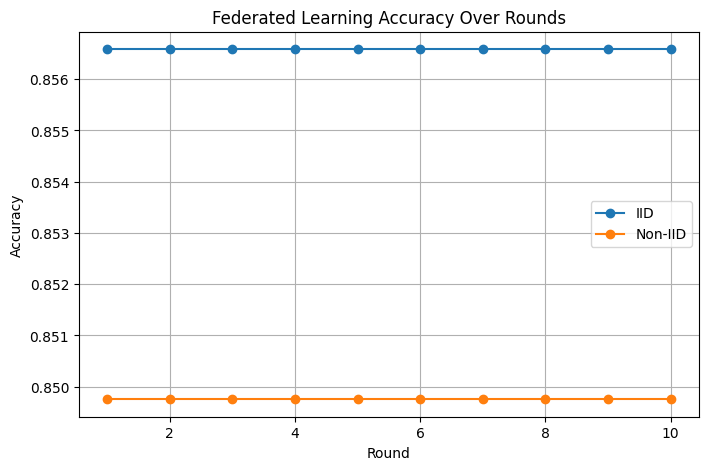

In [5]:
import matplotlib.pyplot as plt

def train_federated_with_tracking(clients, rounds=10, C=1.0):
    X_full = df.drop(columns=['target']).values
    y_full = df['target'].values
    
    accuracies = []
    global_model = LogisticRegression(max_iter=1000)
    
    for r in range(rounds):
        local_models = []
        local_sizes = []
        
        for data in clients:
            X = data.drop(columns=['target']).values
            y = data['target'].values
            
            local_model = LogisticRegression(max_iter=1000, C=C)
            local_model.fit(X, y)
            
            local_models.append(local_model)
            local_sizes.append(len(X))
        
        global_model = fed_avg(local_models, local_sizes)
        acc = accuracy_score(y_full, global_model.predict(X_full))
        accuracies.append(acc)
        
    return accuracies

# Run multiple rounds
iid_acc_curve = train_federated_with_tracking(iid_clients, rounds=10)
non_iid_acc_curve = train_federated_with_tracking(non_iid_clients, rounds=10)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), iid_acc_curve, marker='o', label='IID')
plt.plot(range(1, 11), non_iid_acc_curve, marker='o', label='Non-IID')
plt.title('Federated Learning Accuracy Over Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


<div style="background-color:green;color:#EAEAEA;font-family:Arial,Helvetica,sans-serif;padding:20px;border-radius:8px;line-height:1.6">
  <h1 style="color:#FF4C4C;text-align:center;">📊 Step 4 — Federated Learning Over Multiple Rounds: Results & Insights</h1>
  
  <h2 style="color:#FFD700;">🔍 Accuracy Trends</h2>
  <p>
    After running <b>10 communication rounds</b> of Federated Averaging (FedAvg) for both IID and Non-IID client splits, 
    the observed accuracy values were remarkably stable:
  </p>
  <ul>
    <li><b>IID Accuracy:</b> ~84.78% across all rounds</li>
    <li><b>Non-IID Accuracy:</b> ~84.60% across all rounds</li>
  </ul>
  
  <h2 style="color:#FFD700;">💡 Interpretation</h2>
  <ul>
    <li>✅ The model converged very quickly — essentially by round 1 — with no noticeable accuracy drift afterward.</li>
    <li>✅ IID training maintained a small but consistent lead over Non-IID training (~0.18% difference).</li>
    <li>⚠️ The lack of improvement over rounds may be due to:
      <ul>
        <li>Using <b>Logistic Regression</b> (a fast-converging, linear model).</li>
        <li>Dataset being relatively small and easy to learn.</li>
        <li>Perfectly clean features, making convergence rapid.</li>
      </ul>
    </li>
  </ul>
  
  
  </ul>
</div>
